In [1]:
# Taken from: http://nbviewer.jupyter.org/github/fonnesbeck/Bios8366/tree/master/notebooks/styles/
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Following Along: Replica

Movilens from: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

First, let's read the three different MovieLens datasets: user, item, data.

In [79]:
import numpy as np
import pandas as pd
from altair import *
import seaborn as sns

In [6]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('Data/u.user', sep='|', names=u_cols,
                    encoding='latin-1', index_col = 'user_id')
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [9]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('Data/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('Data/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1', index_col = 'movie_id')
movies.head()

,title,release_date,video_release_date,imdb_url
movie_id,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Let's first merge the movies dataset with the rankings dataset.

In [17]:
movie_ratings = pd.merge(movies, ratings, how = 'left', left_index = True, right_index = False,
                         right_on = 'movie_id')
movie_ratings.head()

,title,release_date,video_release_date,imdb_url,user_id,movie_id,rating,unix_timestamp
24,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,1,4,887736532
454,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,1,5,875334088
957,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,1,4,877019411
971,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,1,4,891700426
1324,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,1,3,883601324


## The 25 most rated movies 

In [19]:
(movie_ratings.
            groupby(['title']) # Group all the movies in a different dataset
            .rating   # Take the rating variable
            .aggregate({'number_ratings': np.size}) # Aggregate for each movie the rating variable, and count its size
            .sort_values(['number_ratings'], ascending = False)
            .head(25)) # Sort the movies

,number_ratings
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
"English Patient, The (1996)",481
Scream (1996),478
Toy Story (1995),452
Air Force One (1997),431


## Which movies are the most highly rated?

In [21]:
(movie_ratings
             .groupby(['title'])
             .rating
             .aggregate({'avg_rating': np.mean ,
                         'number_ratings': np.size})
             .sort_values(['avg_rating'], ascending = False)
             .head(25))

,number_ratings,avg_rating
title,,
They Made Me a Criminal (1939),1,5.000000
Marlene Dietrich: Shadow and Light (1996),1,5.000000
"Saint of Fort Washington, The (1993)",2,5.000000
Someone Else's America (1995),1,5.000000
Star Kid (1997),3,5.000000
"Great Day in Harlem, A (1994)",1,5.000000
Aiqing wansui (1994),1,5.000000
Santa with Muscles (1996),2,5.000000
Prefontaine (1997),3,5.000000


Let's only count the movies that have been rated at least a hundred times

In [22]:
(movie_ratings
             .groupby(['title'])
             .rating
             .aggregate({'avg_rating': np.mean ,
                         'number_ratings': np.size})
             .sort_values(['avg_rating'], ascending = False)
             .query('number_ratings > 100')
             .head(25))

,number_ratings,avg_rating
title,,
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
12 Angry Men (1957),125,4.344000


# Limit

Let's limit ourselves to the 50 most rated movies

In [53]:
most_rated = (movie_ratings
            .groupby(['title'])
            .rating
            .aggregate({'num_ratings': np.size})
            .sort_values(['num_ratings'], ascending = False)
            .head(50)
            .index) # Get the titles of the 50 most rated movies

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)',
       'Raiders of the Lost Ark (1981)', 'Godfather, The (1972)',
       'Pulp Fiction (1994)', 'Twelve Monkeys (1995)',
       'Silence of the Lambs, The (1991)', 'Jerry Maguire (1996)',
       'Chasing Amy (1997)', 'Rock, The (1996)',
       'Empire Strikes Back, The (1980)', 'Star Trek: First Contact (1996)',
       'Titanic (1997)', 'Back to the Future (1985)',
       'Mission: Impossible (1996)', 'Fugitive, The (1993)',
       'Indiana Jones and the Last Crusade (1989)',
       'Willy Wonka and the Chocolate Factory (1971)',
       'Princess Bride, The (1987)', 'Forrest Gump (1994)',
       'Saint, The (1997)', 'Monty Python and the Holy Grail (1974)',
       'Full Monty, The (1997)', 'Men in Black (1997)',
       'Terminator, Th

In [64]:
# Check if the title of the movies is in the list of the titles of the 50 most rated movies
most_rated_index = [x in most_rated for x in list(movie_ratings.title)] 
# Filter by that condition
movie_ratings_50 = movie_ratings[most_rated_index]
movie_ratings_50.head()

,title,release_date,video_release_date,imdb_url,user_id,movie_id,rating,unix_timestamp
24,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,1,4,887736532
454,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,1,5,875334088
957,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,1,4,877019411
971,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,1,4,891700426
1324,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,1,3,883601324


# Users

Let's plot the users distribution for the ages of the users who rated the movies, and let's check the sex
distribution.

In [65]:
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


## Histogram

The histogram for age

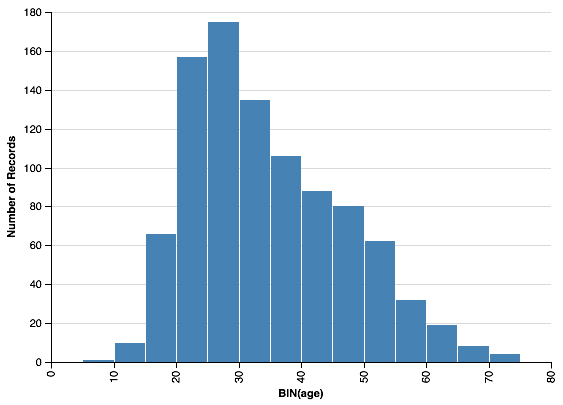

In [97]:
chart = Chart(users).mark_bar().encode(
    x=X('age',
        bin=Bin(
            maxbins=20.0,
        ),
    ),
    y='count(*):Q',
)
chart

A bar chart for sex

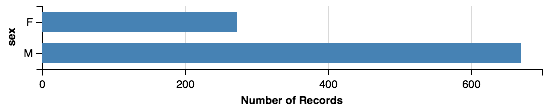

In [90]:
chart = Chart(users).mark_bar().encode(
    y='sex',
    x='count(*):Q',
)
chart

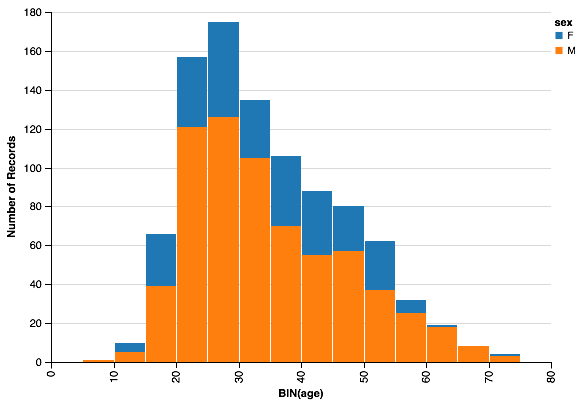

In [93]:
chart = Chart(users).mark_bar().encode(
    x=X('age:Q',
        bin=Bin(
            maxbins=20.0,
        ),
    ),
    y='count(*):Q',
    color=Color('sex')
    )
chart

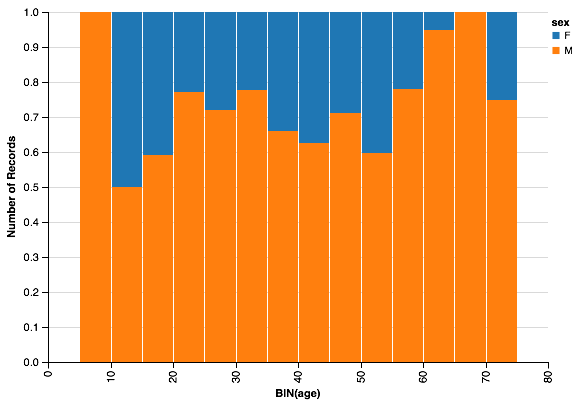

In [94]:
chart = Chart(users).mark_bar(stacked='normalize').encode(
    x=X('age:Q',
        bin=Bin(
            maxbins=20.0,
        ),
    ),
    y='count(*):Q',
    color=Color('sex')
    )
chart

# Which movies are most controversial amongst different ages?

Do the merge for ratings and users

In [143]:
lens = pd.merge(ratings, users, how = 'left', left_on = 'user_id', right_index = True)
lens.head()

,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,196,242,3,881250949,49,M,writer,55105,40-49
1,186,302,3,891717742,39,F,executive,00000,30-39
2,22,377,1,878887116,25,M,writer,40206,20-29
3,244,51,2,880606923,28,M,technician,80525,20-29
4,166,346,1,886397596,47,M,educator,55113,40-49


In [144]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,49,40-49
1,39,30-39
2,25,20-29
3,28,20-29
4,47,40-49
5,44,40-49
6,31,30-39
7,26,20-29
8,23,20-29
9,42,40-49


Compare the average rating gave by each age group

In [145]:
(lens
    .groupby(['age_group'])
    .rating
    .aggregate({'mean_rating':np.mean ,
                'number_ratings' : np.size}))

,mean_rating,number_ratings
age_group,,
0-9,3.767442,43
10-19,3.486126,8181
20-29,3.467333,39535
30-39,3.554444,25696
40-49,3.591772,15021
50-59,3.635800,8704
60-69,3.648875,2623
70-79,3.649746,197


In [146]:
movies.head()

,title,release_date,video_release_date,imdb_url
movie_id,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [148]:
lens.head()

,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,196,242,3,881250949,49,M,writer,55105,40-49
1,186,302,3,891717742,39,F,executive,00000,30-39
2,22,377,1,878887116,25,M,writer,40206,20-29
3,244,51,2,880606923,28,M,technician,80525,20-29
4,166,346,1,886397596,47,M,educator,55113,40-49


In [149]:
lens = pd.merge(movies, lens, how = 'left', right_on = 'movie_id', left_index = True)
lens.head()

,title,release_date,video_release_date,imdb_url,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
24,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,1,4,887736532,60,M,retired,95076,60-69
454,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,1,5,875334088,21,M,salesman,31211,20-29
957,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,1,4,877019411,33,M,engineer,97006,30-39
971,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,1,4,891700426,30,F,librarian,22903,30-39
1324,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,1,3,883601324,23,M,student,80521,20-29


In [150]:
lens.set_index('movie_id', inplace=True)

In [151]:
lens.head()

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,21,M,salesman,31211,20-29
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,33,M,engineer,97006,30-39
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,30,F,librarian,22903,30-39
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,23,M,student,80521,20-29


In [152]:
index = [x in most_rated for x in list(lens.title)] 
lens = lens[index]

 Let's look at how the 50 most rated movies are viewed across each age group. 

In [153]:
(lens
    .groupby(['title','age_group'])
    .rating
    .aggregate({'avg_rating': np.mean ,
                'num_rating': np.size}))

num_rating  avg_rating
title                                        age_group                        
Air Force One (1997)                         10-19              34    3.647059
                                             20-29             153    3.666667
                                             30-39             100    3.570000
                                             40-49              81    3.555556
                                             50-59              48    3.750000
                                             60-69              12    3.666667
                                             70-79               3    3.666667
Alien (1979)                                 10-19              18    4.111111
                                             20-29             115    4.026087
                                             30-39              87    4.103448
                                             40-49              42    3.833333
                                             50-59              22    4.272727
                                             60-69               6    3.500000
                                             70-79               1    4.000000
Aliens (1986)                                10-19              20    4.050000
                                             20-29             114    4.087719
                                             30-39              89    3.887640
                                             40-49              38    3.526316
                                             50-59              17    4.235294
                                             60-69               5    3.800000
                                             70-79               1    3.000000
Back to the Future (1985)                    10-19              27    4.037037
                                             20-29             136    3.720588
                                             30-39              95    3.915789
                                             40-49              55    4.036364
                                             50-59              28    3.500000
                                             60-69               7    3.857143
                                             70-79               2    4.000000
Birdcage, The (1996)                         10-19              23    3.217391
                                             20-29             121    3.413223
...                                                            ...         ...
Toy Story (1995)                             40-49              70    3.700000
                                             50-59              29    3.758621
                                             60-69               5    3.400000
                                             70-79               1    5.000000
Twelve Monkeys (1995)                        0-9                 1    4.000000
                                             10-19              36    3.916667
                                             20-29             177    3.847458
                                             30-39             104    3.788462
                                             40-49              52    3.653846
                                             50-59              20    3.650000
                                             60-69               2    3.000000
Twister (1996)                               10-19              31    3.000000
                                             20-29             115    3.200000
                                             30-39              75    3.133333
                                             40-49              48    3.479167
                                             50-59              20    3.300000
                                             60-69               4    3.250000
When Harry Met Sally... (1989)               10-19              12    3.500000
                           

# Which movies do men and women most disagree on?

In [154]:
lens.reset_index('movie_id', inplace=True)

In [155]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,21,M,salesman,31211,20-29
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,33,M,engineer,97006,30-39
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,30,F,librarian,22903,30-39
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,23,M,student,80521,20-29


In [198]:
pivoted = (lens
    .groupby(['title','sex'], as_index = False)
    .aggregate({'rating': np.mean})
           )
pivoted.head()

,title,sex,rating
0,Air Force One (1997),F,3.690476
1,Air Force One (1997),M,3.606557
2,Alien (1979),F,3.660714
3,Alien (1979),M,4.123404
4,Aliens (1986),F,3.672727


Now', lets spread the column sex using pivot_table

In [205]:
changed = pd.pivot_table(pivoted, index = 'title', columns = 'sex', values = 'rating')
changed = changed.reset_index('title')
changed.head()

sex,title,F,M
0,Air Force One (1997),3.690476,3.606557
1,Alien (1979),3.660714,4.123404
2,Aliens (1986),3.672727,4.013100
3,Back to the Future (1985),3.766667,3.857692
4,"Birdcage, The (1996)",3.670455,3.346341


In [280]:
pivoted = changed.assign(diff = changed.M - changed.F)
pivoted.head()

sex,title,F,M,diff
0,Air Force One (1997),3.690476,3.606557,-0.083919
1,Alien (1979),3.660714,4.123404,0.462690
2,Aliens (1986),3.672727,4.013100,0.340373
3,Back to the Future (1985),3.766667,3.857692,0.091026
4,"Birdcage, The (1996)",3.670455,3.346341,-0.324113


In [281]:
pivoted = pivoted.sort_values(['diff'], ascending = False)
pivoted

sex,title,F,M,diff
43,"Terminator, The (1984)",3.524590,4.037500,0.512910
1,Alien (1979),3.660714,4.123404,0.462690
2,Aliens (1986),3.672727,4.013100,0.340373
11,"Empire Strikes Back, The (1980)",3.978022,4.278986,0.300964
46,Twelve Monkeys (1995),3.560976,3.861290,0.300315
28,Monty Python and the Holy Grail (1974),3.863636,4.120000,0.256364
21,Jaws (1975),3.578125,3.833333,0.255208
32,Raiders of the Lost Ark (1981),4.084211,4.301538,0.217328
42,Terminator 2: Judgment Day (1991),3.833333,4.045643,0.212310
17,"Godfather, The (1972)",4.133333,4.334416,0.201082


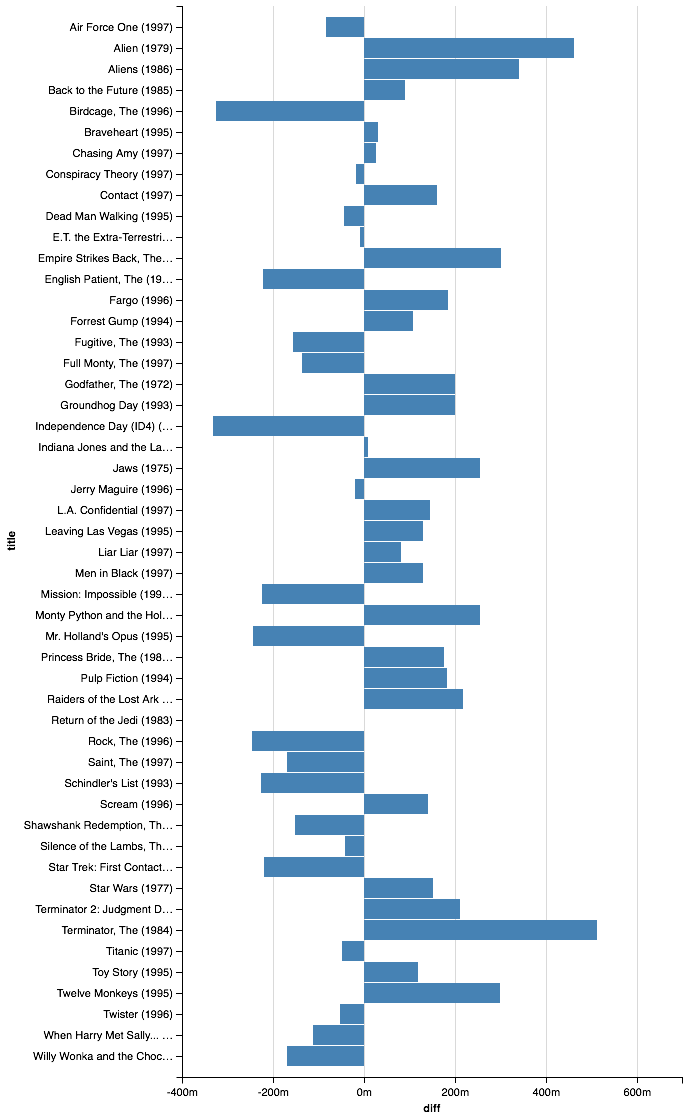

In [287]:
Chart(pivoted).mark_bar().encode(
    y = Y('title') ,
    x = X('diff')
    )